## Show images in Jupyter

In [10]:
from PIL import Image
from IPython.display import display
import numpy as np

## Using PIL package

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.Image.Image'> (512, 512)


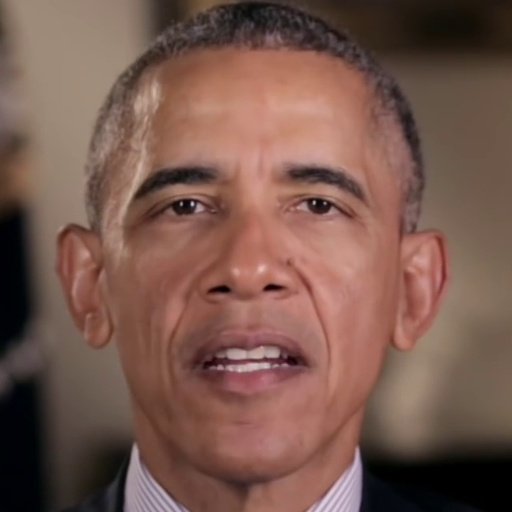

In [5]:
image_path = "./data/obama.jpg"

## Read the image
im = Image.open(image_path) # in RGB order
print(type(im))

## convert to numpy array
a = np.asarray(im)

## From a numpy array to PIL image
im = Image.fromarray(a)
print(type(im), im.size)

## Save image
im.save("ob.jpg")

display(im) ## In RGB order by default

## Image transform

256 256
(512, 512)


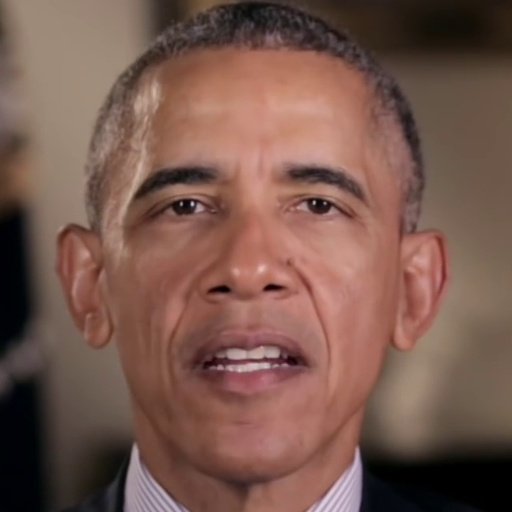

In [18]:
image_path = "./data/obama.jpg"
img = Image.open(image_path)

t = np.stack([256, 256], axis=0)
w0, h0 = img.size
print(t[0], t[1])

img = img.transform(img.size, Image.AFFINE, (1, 0, t[0] - w0/2, 0, 1, h0/2 - t[1]))

print(img.size)
display(img) ## In RGB order by default

## Crop image

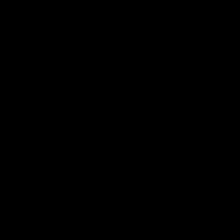

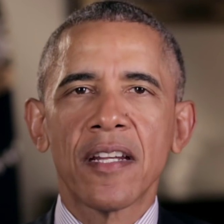

-8 11 216 235


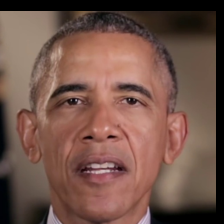

In [16]:
w, h = 224, 224


img_src = Image.new('RGB', (w, h), (0, 0, 0))

img_recon = Image.new('RGB', (w, h), (125, 125, 255))
image_path = "./data/obama.jpg"
img_recon = Image.open(image_path)
img_recon = img_recon.resize((224, 224))

display(img_src)
display(img_recon)

x1, y1 = -8, 11
x2, y2 = x1 + w, y1 + h
print(x1, y1, x2, y2)

img_src.paste(img_recon, (x1, y1))
display(img_src)




## Use skimage package

(512, 512, 3) <class 'numpy.ndarray'>


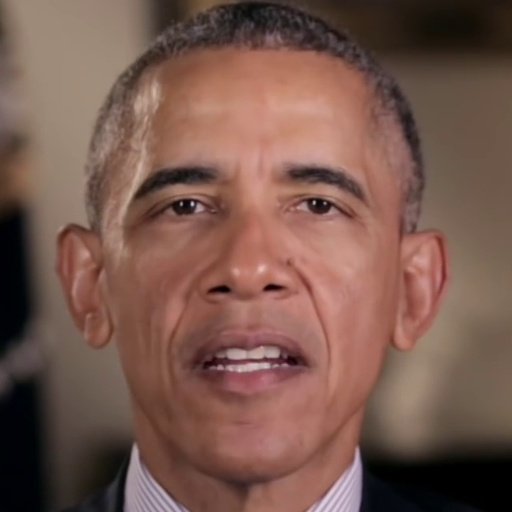

In [3]:
from skimage import io
from skimage import color

image_path = "./data/obama.jpg"
img_src = io.imread(image_path)  ## in RGB order

print(img_src.shape, type(img_src))

display(Image.fromarray(img_src))


## Resize image

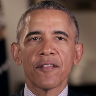

True

In [6]:
import cv2
image_path = "/home/haimingzhang/Research/Face/FACIAL/video_preprocessed/id00002/obama_weekly_2/face_image/000004.jpg"

img = cv2.imread(image_path)

img_resized = cv2.resize(img, (96, 96), cv2.INTER_AREA)
display(Image.fromarray(img_resized[..., ::-1]))\

cv2.imwrite("resize_img2.jpg", img_resized)

## Visualize image pixel

(35709, 2) float32 24.951107 203.41829


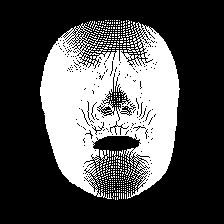

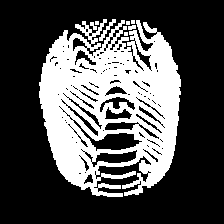

In [31]:
import numpy as np

def draw_landmarks(img, landmark, color='r', step=2):
    """
    Return:
        img              -- numpy.array, (B, H, W, 3) img with landmark, RGB order, range (0, 255)
        

    Parameters:
        img              -- numpy.array, (B, H, W, 3), RGB order, range (0, 255)
        landmark         -- numpy.array, (B, 68, 2), y direction is opposite to v direction
        color            -- str, 'r' or 'b' (red or blue)
    """
    if color =='r':
        c = np.array([255., 255.0, 255.0])
    else:
        c = np.array([0, 0, 255.])

    _, H, W, _ = img.shape
    img, landmark = img.copy(), landmark.copy()
    landmark[..., 1] = H - 1 - landmark[..., 1]
    landmark = np.round(landmark).astype(np.int32)
    for i in range(landmark.shape[1]):
        x, y = landmark[:, i, 0], landmark[:, i, 1]
        for j in range(-step, step):
            for k in range(-step, step):
                u = np.clip(x + j, 0, W - 1)
                v = np.clip(y + k, 0, H - 1)
                for m in range(landmark.shape[0]):
                    img[m, v[m], u[m]] = c
    return img


def vis_point_coords(npy_file, image_size=224):
    point = np.load(npy_file)
    if len(point.shape) == 3:
        point = point[0]

    # point = point[::2, :]
    
    print(point.shape, point.dtype, point.min(), point.max())

    image = np.zeros((image_size, image_size, 3)).astype(np.float32)

    for idx in point:
        idx = idx.astype(np.int)
        idx[1] = image_size - 1 - idx[1]
        # idx[1] = image_size - 1 - idx[1]
        image[idx[1], idx[0]] = np.array([255, 255, 255])

    image = image.astype(np.uint8)
    display(Image.fromarray(image))

example = "/home/haimingzhang/Research/Programming/cv-fighter/face_fighter/3DMM/example.npy"
# example = "/home/haimingzhang/Github/HDTF/code_constructing_Fapp/test_data/taile_source_points.npy"

vis_point_coords(example, image_size=224)

img = np.zeros((224, 224, 3)).astype(np.float32)

point = np.load(example)

if len(point.shape) == 3:
    point = point[0]

point = point[::10, :]
img = draw_landmarks(img[None], point[None])[0]
image = img.astype(np.uint8)
display(Image.fromarray(image))